# bibliotecas

In [2]:
import numpy as np
import sympy as sy
from sympy import *
import matplotlib.pyplot as plt

# funções para cálculo de zeros de $f(x)=0$

In [33]:
def erro_relativo(x, x_barra):
    return np.abs(x-x_barra) / max([1,np.abs(x)])
    
def metodo_bisseccao(fx, a, b, epsilon, MAX_ITER):
    '''
    Método da bissecção.
    
    Entrada:
        fx : função.
        a : limite inferior do intervalo de busca.
        b : limite superior do intervalo de busca.
        epsilon : tolerância.
        MAX_ITER : número máximo de iterações.
    Saída:
        xk : zero de f(x)
    '''
    f = lambdify(x, fx)
    assert f(a)*f(b) < 0, f'f({a})={f(a)} and f({b})={f(b)}'
    x0 = 1.0e+20
    k = 1
    while k < MAX_ITER:
        xk = (a+b)*0.5
        fxk = f(xk)
        varepsilon = erro_relativo(xk, x0)
        print(f'ITERAÇÃO {k}: x={xk}, f(x)={fxk}, erro = {varepsilon}')
        if varepsilon < epsilon:
            print(f'Convergência após {k} iterações!')
            break
        if f(a) * fxk < 0:
            b = xk
        else:
            a = xk
        x0 = xk
        k += 1
    print(f'O programa terminou após {k} iterações!')
    return xk

def metodo_iteracao_linear(fx, psix, a, b, epsilon, MAX_ITER):
    '''
    Método da iteração linear.
    
    Entrada:
        fx : função.
        psix : função psi(x).
        a : limite inferior do intervalo de busca.
        b : limite superior do intervalo de busca.
        epsilon : tolerância.
        MAX_ITER : número máximo de iterações.
    Saída:
        xk : zero de f(x)
    '''
    f = lambdify(x, fx)
    psi = lambdify(x, psix)
    x0 = (a+b)*0.5
    k = 1
    while k < MAX_ITER:
        xk = psi(x0)
        fxk = f(xk)
        varepsilon = erro_relativo(xk, x0)
        print(f'ITERAÇÃO {k}: x={xk}, f(x)={fxk}, erro = {varepsilon}')
        if varepsilon < epsilon:
            print(f'Convergência após {k} iterações!')
            break
        x0 = xk
        k += 1
    print(f'O programa terminou após {k} iterações!')
    return xk

def metodo_newton(fx, fxd, a, b, epsilon, MAX_ITER):
    '''
    Método de Newton.
    
    Entrada:
        fx : função f(x).
        fxd : derivada de f(x).
        a : limite inferior do intervalo de busca.
        b : limite superior do intervalo de busca.
        epsilon : tolerância.
        MAX_ITER : número máximo de iterações.
    Saída:
        xk : zero de f(x)
    '''
    f = lambdify(x, fx)
    fd = lambdify(x, fxd)
    x0 = (a+b)*0.5
    k = 1
    while k < MAX_ITER:
        xk = x0 - f(x0) / fd(x0)
        fxk = f(xk)
        varepsilon = erro_relativo(xk, x0)
        print(f'ITERAÇÃO {k}: x={xk}, f(x)={fxk}, erro = {varepsilon}')
        if varepsilon < epsilon:
            print(f'Convergência após {k} iterações!')
            break
        x0 = xk
        k += 1
    print(f'O programa terminou após {k} iterações!')
    return xk

def metodo_secantes(fx, a, b, epsilon, MAX_ITER):
    '''
    Método das secantes.
    
    Entrada:
        fx : função f(x).
        a : limite inferior do intervalo de busca.
        b : limite superior do intervalo de busca.
        epsilon : tolerância.
        MAX_ITER : número máximo de iterações.
    Saída:
        xk : zero de f(x)
    '''
    f = lambdify(x, fx)
    x0 = (a+b)*0.4
    x1 = (a+b)*0.6
    k = 1
    while k < MAX_ITER:
        xk = (x0*f(x1) - x1*f(x0)) / (f(x1) - f(x0))
        fxk = f(xk)
        varepsilon = erro_relativo(xk, x1)
        print(f'ITERAÇÃO {k}: x={xk}, f(x)={fxk}, erro = {varepsilon}')
        if varepsilon < epsilon:
            print(f'Convergência após {k} iterações!')
            break
        x0 = x1
        x1 = xk
        k += 1
    print(f'O programa terminou após {k} iterações!')
    return xk

def metodo_regula_falsi(fx, a, b, epsilon, MAX_ITER):
    '''
    Método das secantes.
    
    Entrada:
        fx : função f(x).
        a : limite inferior do intervalo de busca.
        b : limite superior do intervalo de busca.
        epsilon : tolerância.
        MAX_ITER : número máximo de iterações.
    Saída:
        xk : zero de f(x)
    '''
    f = lambdify(x, fx)
    assert f(a)*f(b) < 0, f'ERROR: f({a})*f({b})={f(a)*f(b)}\n'
    k = 1
    while k < MAX_ITER:
        fa = f(a)
        fb = f(b)
        xk = (a*fb - b*fa) / (fb - fa)
        fxk = f(xk)
        varepsilon1 = erro_relativo(xk, a)
        varepsilon2 = erro_relativo(xk, b)
        varepsilon = varepsilon1 if varepsilon1 < varepsilon2 else varepsilon2
        print(f'ITERAÇÃO {k}: x={xk}, f(x)={fxk}, erro = {varepsilon}')
        if varepsilon < epsilon:
            print(f'Convergência após {k} iterações!')
            break
        if fa*fxk < 0:
            b = xk
        else:
            a = xk
        k += 1
    print(f'O programa terminou após {k} iterações!')
    return xk

In [23]:
# set x as symbol
x = sy.Symbol("x")

In [35]:
# erro e número máximo de iteração
epsilon = 0.001
MAX_ITER = 30

# teste dos métodos em $f(x)=(x+1)^2e^{(x^2-2)}-1$

In [83]:
# função
fx = (x+1)**2*sy.exp(x**2-2)-1

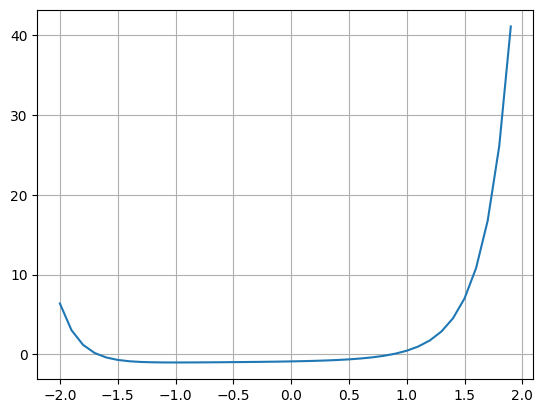

In [84]:
# verificação dos intervalos das raízes
x_np = np.arange(-2,2,0.1)
f = lambdify(x, fx)
fx_np = f(x_np)

plt.plot(x_np, fx_np)
plt.grid()
plt.show()

In [85]:
# Intervalos de busca: (-2,-1) e (0,1)
intervalos = [(-2, -1), (0,1)]

# método da bissecção

In [86]:
for a, b in intervalos:
    xk = metodo_bisseccao(fx, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=-1.5, f(x)=-0.6789936458280647, erro = 6.666666666666666e+19
ITERAÇÃO 2: x=-1.75, f(x)=0.6276477185966156, erro = 0.14285714285714285
ITERAÇÃO 3: x=-1.625, f(x)=-0.2587240037741724, erro = 0.07692307692307693
ITERAÇÃO 4: x=-1.6875, f(x)=0.10325990938046403, erro = 0.037037037037037035
ITERAÇÃO 5: x=-1.65625, f(x)=-0.09449535114557739, erro = 0.018867924528301886
ITERAÇÃO 6: x=-1.671875, f(x)=-0.00019989972460587868, erro = 0.009345794392523364
ITERAÇÃO 7: x=-1.6796875, f(x)=0.05033147741609256, erro = 0.004651162790697674
ITERAÇÃO 8: x=-1.67578125, f(x)=0.024772972575949126, erro = 0.002331002331002331
ITERAÇÃO 9: x=-1.673828125, f(x)=0.012214167079989569, erro = 0.0011668611435239206
ITERAÇÃO 10: x=-1.6728515625, f(x)=0.005989144623980813, erro = 0.0005837711617046118
Convergência após 10 iterações!
O programa terminou após 10 iterações!

Zero da função no intervalo [-2,-1]: -1.6728515625

ITERAÇÃO 1: x=0.5, f(x)=-0.6090086272364985, erro = 1e+20
ITERAÇÃO 2: x=0.75, f(x)

# método da iteração linear

In [89]:
# função psi(x)
psix = 0.5*(sy.exp(2-x**2)-x**2-1)

for a, b in intervalos:
    xk = metodo_iteracao_linear(fx, psix, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')


ITERAÇÃO 1: x=-1.2355996084642975, f(x)=-0.9654219636380366, erro = 0.21398549313585535
ITERAÇÃO 2: x=-0.46071687922993465, f(x)=-0.9513337305645546, erro = 0.7748827292343629
ITERAÇÃO 3: x=2.3818356447675697, f(x)=449.32896236461653, erro = 1.1934293326418388
ITERAÇÃO 4: x=-3.3238722328854045, f(x)=45916.25911802523, erro = 1.7165845970860119
ITERAÇÃO 5: x=-6.024004504692803, f(x)=1.9654543427025464e+16, erro = 0.4482287936046444
ITERAÇÃO 6: x=-18.64431513627959, f(x)=3.889886779238199e+152, erro = 0.6768985902318924
ITERAÇÃO 7: x=-174.30524345045214, f(x)=inf, erro = 0.8930364068962766
ITERAÇÃO 8: x=-15191.658947160695, f(x)=inf, erro = 0.988526253514727
ITERAÇÃO 9: x=-115393251.2834238, f(x)=inf, erro = 0.9998683488091531
ITERAÇÃO 10: x=-6657801220879694.0, f(x)=inf, erro = 0.999999982667964
ITERAÇÃO 11: x=-2.216315854837357e+31, f(x)=inf, erro = 0.9999999999999998
ITERAÇÃO 12: x=-2.4560279842017223e+62, f(x)=inf, erro = 1.0
ITERAÇÃO 13: x=-3.0160367295909877e+124, f(x)=inf, erro = 

<lambdifygenerated-107>:2: RuntimeWarning: overflow encountered in exp
  return (x + 1)**2*exp(x**2 - 2) - 1
<lambdifygenerated-107>:2: RuntimeWarning: overflow encountered in scalar power
  return (x + 1)**2*exp(x**2 - 2) - 1
<lambdifygenerated-108>:2: RuntimeWarning: overflow encountered in scalar power
  return -0.5*x**2 + 0.5*exp(2 - x**2) - 0.5
/tmp/ipykernel_29241/1112878929.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.abs(x-x_barra) / max([1,np.abs(x)])
/tmp/ipykernel_29241/1112878929.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  return np.abs(x-x_barra) / max([1,np.abs(x)])
<lambdifygenerated-109>:2: RuntimeWarning: overflow encountered in exp
  return (x + 1)**2*exp(x**2 - 2) - 1
<lambdifygenerated-109>:2: RuntimeWarning: overflow encountered in scalar power
  return (x + 1)**2*exp(x**2 - 2) - 1
<lambdifygenerated-110>:2: RuntimeWarning: overflow encountered in scalar power
  return -0.5*x**2 + 0.5*exp(2 - x**2) - 0.5


# método de Newton

In [41]:
# derivada de fx
fxd = sy.diff(fx, x)

for a, b in intervalos:
    xk = metodo_newton(fx, fxd, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=-1.8021718760408028, f(x)=1.2410818122821747, erro = 0.167670953063947
ITERAÇÃO 2: x=-1.7113510289634712, f(x)=0.28087549622704633, erro = 0.05306967743043329
ITERAÇÃO 3: x=-1.6761769707051446, f(x)=0.02733528163117671, erro = 0.020984692471660318
ITERAÇÃO 4: x=-1.671960287125077, f(x)=0.0003391857432082368, erro = 0.0025219998420645596
ITERAÇÃO 5: x=-1.6719066391280342, f(x)=5.400113511910831e-08, erro = 3.208791435313113e-05
Convergência após 5 iterações!
O programa terminou após 5 iterações!

Zero da função no intervalo [-2,-1]: -1.6719066391280342

ITERAÇÃO 1: x=1.1675433668582345, f(x)=1.485183221943427, erro = 0.5717503827327117
ITERAÇÃO 2: x=0.9841014857374799, f(x)=0.4032459006500946, erro = 0.18344188112075455
ITERAÇÃO 3: x=0.887547158385979, f(x)=0.060029068824816845, erro = 0.09655432735150093
ITERAÇÃO 4: x=0.8675696533561941, f(x)=0.0019548816722165796, erro = 0.019977505029784903
ITERAÇÃO 5: x=0.8668743458305838, f(x)=2.2506204999661605e-06, erro = 0.00069530

# método das secantes

In [42]:
for a, b in intervalos:
    xk = metodo_secantes(fx, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=-1.4678663718507305, f(x)=-0.7444950312918284, erro = 0.22626966222443334
ITERAÇÃO 2: x=-1.5942778013392531, f(x)=-0.3929202252973283, erro = 0.07929071670089882
ITERAÇÃO 3: x=-1.7355552947998187, f(x)=0.4886848177618639, erro = 0.0814018970665298
ITERAÇÃO 4: x=-1.6572433946023581, f(x)=-0.08875735042251254, erro = 0.0472543142742475
ITERAÇÃO 5: x=-1.6692805424780213, f(x)=-0.016469265979770165, erro = 0.007210979562365331
ITERAÇÃO 6: x=-1.6720229445146826, f(x)=0.0007354064246958281, erro = 0.0016401700979392485
ITERAÇÃO 7: x=-1.6719057217027948, f(x)=-5.744493737913636e-06, erro = 7.011329069940802e-05
Convergência após 7 iterações!
O programa terminou após 7 iterações!

Zero da função no intervalo [-2,-1]: -1.6719057217027948

ITERAÇÃO 1: x=1.143327302785251, f(x)=1.297717395002575, erro = 0.4752158909016303
ITERAÇÃO 2: x=0.7518586778670674, f(x)=-0.2690088139047402, erro = 0.3914686249181837
ITERAÇÃO 3: x=0.8190743214628976, f(x)=-0.12406355467878605, erro = 0.0672156

# método Regula Falsi

In [43]:
for a, b in intervalos:
    xk = metodo_regula_falsi(fx, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=-1.1353352832366126, f(x)=-0.9910043467868934, erro = 0.11920292202211748
ITERAÇÃO 2: x=-1.251443613124751, f(x)=-0.9590319144620365, erro = 0.09277951373152608
ITERAÇÃO 3: x=-1.3491410636015722, f(x)=-0.8981625006767143, erro = 0.07241455553655364
ITERAÇÃO 4: x=-1.4293605714855397, f(x)=-0.8075357384694681, erro = 0.05612265336282164
ITERAÇÃO 5: x=-1.4933925108697381, f(x)=-0.6935434562016984, erro = 0.04287683172249656
ITERAÇÃO 6: x=-1.5430006111462051, f(x)=-0.5684788614374987, erro = 0.03215040870244117
ITERAÇÃO 7: x=-1.5803406308130974, f(x)=-0.4461179922135702, erro = 0.02362782993668937
ITERAÇÃO 8: x=-1.6077309492890872, f(x)=-0.3371769516658796, erro = 0.01703663071741039
ITERAÇÃO 9: x=-1.6273948654449277, f(x)=-0.24719141460940464, erro = 0.012083063903771394
ITERAÇÃO 10: x=-1.6412739123179494, f(x)=-0.1770148570696226, erro = 0.00845626483724491
ITERAÇÃO 11: x=-1.6509448171198777, f(x)=-0.12457169785206734, erro = 0.005857800152763142
ITERAÇÃO 12: x=-1.657620420

# teste dos métodos para $f(x)=x^3+3x-1$

In [52]:
# função
fx = x**3 + 3*x - 1

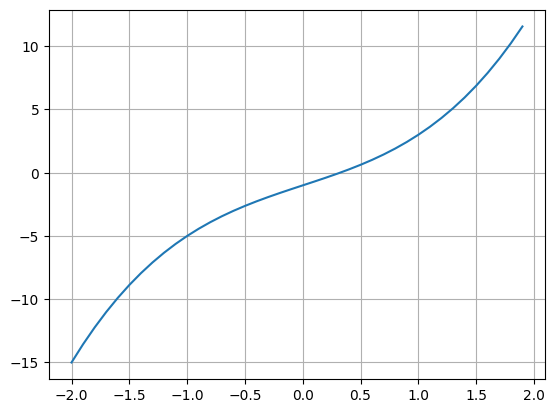

In [55]:
# verificação dos intervalos das raízes
x_np = np.arange(-2,2,0.1)
f = lambdify(x, fx)
fx_np = f(x_np)

plt.plot(x_np, fx_np)
plt.grid()
plt.show()

In [58]:
# Intervalos de busca:
intervalos = [(0,0.5)]

# método da bissecção

In [59]:
# executa método da bisseção
for a, b in intervalos:
    xk = metodo_bisseccao(fx, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.25, f(x)=-0.234375, erro = 1e+20
ITERAÇÃO 2: x=0.375, f(x)=0.177734375, erro = 0.125
ITERAÇÃO 3: x=0.3125, f(x)=-0.031982421875, erro = 0.0625
ITERAÇÃO 4: x=0.34375, f(x)=0.071868896484375, erro = 0.03125
ITERAÇÃO 5: x=0.328125, f(x)=0.019702911376953125, erro = 0.015625
ITERAÇÃO 6: x=0.3203125, f(x)=-0.006198406219482422, erro = 0.0078125
ITERAÇÃO 7: x=0.32421875, f(x)=0.006737411022186279, erro = 0.00390625
ITERAÇÃO 8: x=0.322265625, f(x)=0.0002658143639564514, erro = 0.001953125
ITERAÇÃO 9: x=0.3212890625, f(x)=-0.0029672151431441307, erro = 0.0009765625
Convergência após 9 iterações!
O programa terminou após 9 iterações!

Zero da função no intervalo [0,0.5]: 0.3212890625



# método iteração linear

In [61]:
# método da iteração linear
psix = (1-x**3)/3

# executa método nos intervalos
for a, b in intervalos:
    xk = metodo_iteracao_linear(fx, psix, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.328125, f(x)=0.019702911376953125, erro = 0.078125
ITERAÇÃO 2: x=0.32155736287434894, f(x)=-0.002079157360800221, erro = 0.00656763712565106
ITERAÇÃO 3: x=0.322250415327949, f(x)=0.0002154467639092772, erro = 0.0006930524536000737
Convergência após 3 iterações!
O programa terminou após 3 iterações!

Zero da função no intervalo [0,0.5]: 0.322250415327949



# método de Newton

In [62]:
# método da iteração linear
fxd = sy.diff(fx, x)

# executa para cada intervalo
for a, b in intervalos:
    xk = metodo_newton(fx, fxd, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.3235294117647059, f(x)=0.004452473030734927, erro = 0.0735294117647059
ITERAÇÃO 2: x=0.32218588296712575, f(x)=1.749554183527735e-06, erro = 0.0013435287975801513
ITERAÇÃO 3: x=0.3221853546261671, f(x)=2.7000623958883807e-13, erro = 5.283409586498422e-07
Convergência após 3 iterações!
O programa terminou após 3 iterações!

Zero da função no intervalo [0,0.5]: 0.3221853546261671



# método das secantes

In [63]:
# executa para cada intervalo
for a, b in intervalos:
    xk = metodo_secantes(fx, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.322884012539185, f(x)=0.002314015084641685, erro = 0.022884012539184984
ITERAÇÃO 2: x=0.32218090369346364, f(x)=-1.4738844572259602e-05, erro = 0.0007031088457213341
Convergência após 2 iterações!
O programa terminou após 2 iterações!

Zero da função no intervalo [0,0.5]: 0.32218090369346364



# método Regula Falsi

In [64]:
# executa para cada intervalo
for a, b in intervalos:
    xk = metodo_regula_falsi(fx, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.3076923076923077, f(x)=-0.047792444242148346, erro = 0.1923076923076923
ITERAÇÃO 2: x=0.3213530655391121, f(x)=-0.0027553816169756384, erro = 0.013660757846804372
ITERAÇÃO 3: x=0.32213719339138897, f(x)=-0.00015947936239479876, erro = 0.0007841278522768835
Convergência após 3 iterações!
O programa terminou após 3 iterações!

Zero da função no intervalo [0,0.5]: 0.32213719339138897



# teste dos métodos em $f(x)=x^2-\sin x$

In [65]:
# função
fx = x**2 - sy.sin(x)

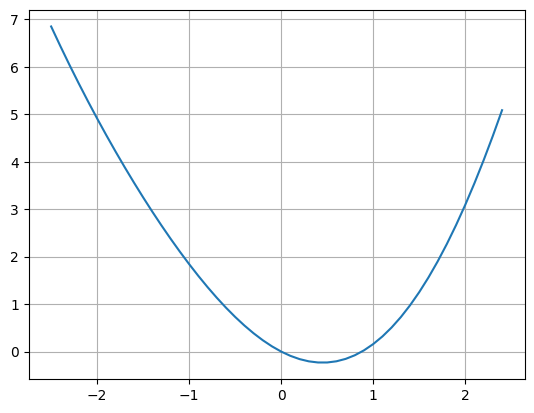

In [68]:
# verificação dos intervalos das raízes
x_np = np.arange(-2.5,2.5,0.1)
f = lambdify(x, fx)
fx_np = f(x_np)

plt.plot(x_np, fx_np)
plt.grid()
plt.show()

In [69]:
# Intervalos de busca:
intervalos = [(0.5,1)]

# método da bissecção

In [70]:
# executa método da bisseção
for a, b in intervalos:
    xk = metodo_bisseccao(fx, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.75, f(x)=-0.11913876002333412, erro = 1e+20
ITERAÇÃO 2: x=0.875, f(x)=-0.0019185022360270754, erro = 0.125
ITERAÇÃO 3: x=0.9375, f(x)=0.07282514173930699, erro = 0.0625
ITERAÇÃO 4: x=0.90625, f(x)=0.03409241516805106, erro = 0.03125
ITERAÇÃO 5: x=0.890625, f(x)=0.015747912378999196, erro = 0.015625
ITERAÇÃO 6: x=0.8828125, f(x)=0.00683009435717552, erro = 0.0078125
ITERAÇÃO 7: x=0.87890625, f(x)=0.00243466232831413, erro = 0.00390625
ITERAÇÃO 8: x=0.876953125, f(x)=0.00025279899118890725, erro = 0.001953125
ITERAÇÃO 9: x=0.8759765625, f(x)=-0.0008341715882815848, erro = 0.0009765625
Convergência após 9 iterações!
O programa terminou após 9 iterações!

Zero da função no intervalo [0.5,1]: 0.8759765625



# método da iteração linear

In [72]:
# método da iteração linear
psix = sy.asin(x**2)

# executa método nos intervalos
for a, b in intervalos:
    xk = metodo_iteracao_linear(fx, psix, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.5974064166453502, f(x)=-0.20560557335096225, erro = 0.1525935833546498
ITERAÇÃO 2: x=0.36494126344446876, f(x)=-0.2237123008845926, erro = 0.23246515320088146
ITERAÇÃO 3: x=0.133579021148379, f(x)=-0.11533877087348607, erro = 0.23136224229608976
ITERAÇÃO 4: x=0.017844301870333232, f(x)=-0.017524935781719504, erro = 0.11573471927804577
ITERAÇÃO 5: x=0.0003184191146203693, f(x)=-0.0003183177185070225, erro = 0.017525882755712863
ITERAÇÃO 6: x=1.0139073255562005e-07, f(x)=-1.0139072227553923e-07, erro = 0.0003183177238878137
Convergência após 6 iterações!
O programa terminou após 6 iterações!

Zero da função no intervalo [0.5,1]: 1.0139073255562005e-07



# método de Newton

In [73]:
# método da iteração linear
fxd = sy.diff(fx, x)

# executa para cada intervalo
for a, b in intervalos:
    xk = metodo_newton(fx, fxd, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.9050657737428616, f(x)=0.03267827405672663, erro = 0.15506577374286157
ITERAÇÃO 2: x=0.8776625559476823, f(x)=0.0010440925306475224, erro = 0.02740321779517929
ITERAÇÃO 3: x=0.8767273027175759, f(x)=1.2110413066812598e-06, erro = 0.0009352532301063476
Convergência após 3 iterações!
O programa terminou após 3 iterações!

Zero da função no intervalo [0.5,1]: 0.8767273027175759



# método das secantes

In [74]:
# executa para cada intervalo
for a, b in intervalos:
    xk = metodo_secantes(fx, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.865406879755847, f(x)=-0.012430051627144612, erro = 0.03459312024415295
ITERAÇÃO 2: x=0.8764032920283588, f(x)=-0.00035952170977171516, erro = 0.010996412272511802
ITERAÇÃO 3: x=0.876730821057211, f(x)=5.129730533681709e-06, erro = 0.000327529028852247
Convergência após 3 iterações!
O programa terminou após 3 iterações!

Zero da função no intervalo [0.5,1]: 0.876730821057211



# método Regula Falsi

In [75]:
# executa para cada intervalo
for a, b in intervalos:
    xk = metodo_regula_falsi(fx, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.795686100806361, f(x)=-0.08122753180353248, erro = 0.20431389919363896
ITERAÇÃO 2: x=0.8649059571673935, f(x)=-0.01297194556840564, erro = 0.06921985636103245
ITERAÇÃO 3: x=0.8751241656396341, f(x)=-0.001780780817604244, erro = 0.010218208472240642
ITERAÇÃO 4: x=0.8765113328368139, f(x)=-0.0002392682926708467, erro = 0.001387167197179795
ITERAÇÃO 5: x=0.8766974337500935, f(x)=-3.205531616345958e-05, erro = 0.00018610091327952993
Convergência após 5 iterações!
O programa terminou após 5 iterações!

Zero da função no intervalo [0.5,1]: 0.8766974337500935



# teste dos métodos em $f(x)=\sin(x)+\ln(x+1)-1$

In [44]:
# função
fx = sy.sin(x) + sy.log(x+1)-1

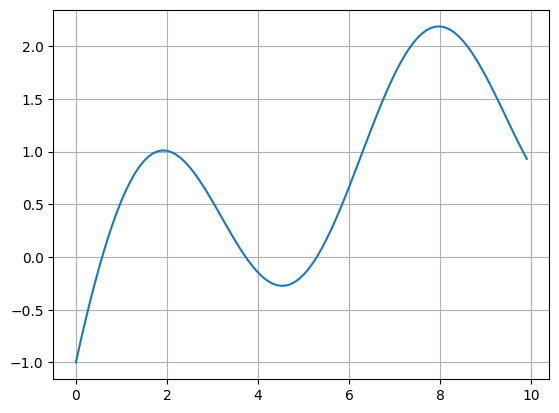

In [45]:
# verificação dos intervalos das raízes
x_np = np.arange(0,10,0.1)
f = lambdify(x, fx)
fx_np = f(x_np)

plt.plot(x_np, fx_np)
plt.grid()
plt.show()

In [46]:
# Intervalos de busca: (0,2), (2,4) e (4,6)
intervalos = [(0,2), (2,4), (4,6)]

# método da bissecção

In [47]:
# executa método da bisseção
for a, b in intervalos:
    xk = metodo_bisseccao(fx, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=1.0, f(x)=0.5346181653678417, erro = 1e+20
ITERAÇÃO 2: x=0.5, f(x)=-0.11510935328763261, erro = 0.5
ITERAÇÃO 3: x=0.75, f(x)=0.24125454795875667, erro = 0.25
ITERAÇÃO 4: x=0.625, f(x)=0.07060508872216298, erro = 0.125
ITERAÇÃO 5: x=0.5625, f(x)=-0.020410223835560348, erro = 0.0625
ITERAÇÃO 6: x=0.59375, f(x)=0.025562861171966045, erro = 0.03125
ITERAÇÃO 7: x=0.578125, f(x)=0.0026920404007910737, erro = 0.015625
ITERAÇÃO 8: x=0.5703125, f(x)=-0.008830239425337005, erro = 0.0078125
ITERAÇÃO 9: x=0.57421875, f(x)=-0.003061876734008706, erro = 0.00390625
ITERAÇÃO 10: x=0.576171875, f(x)=-0.0001831112532793, erro = 0.001953125
ITERAÇÃO 11: x=0.5771484375, f(x)=0.001254916454776378, erro = 0.0009765625
Convergência após 11 iterações!
O programa terminou após 11 iterações!

Zero da função no intervalo [0,2]: 0.5771484375

ITERAÇÃO 1: x=3.0, f(x)=0.5274143691797577, erro = 3.333333333333333e+19
ITERAÇÃO 2: x=3.5, f(x)=0.15329416908665427, erro = 0.14285714285714285
ITERAÇÃO 3: x=

# método da iteração linear

In [48]:
# método da iteração linear
psix = sy.exp(1-sy.sin(x))-1

# executa método nos intervalos
for a, b in intervalos:
    xk = metodo_iteracao_linear(fx, psix, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.17178592332562181, f(x)=-0.6705287276573383, erro = 0.8282140766743782
ITERAÇÃO 2: x=1.2911588620228223, f(x)=0.7902133066594406, erro = 0.8669521401444826
ITERAÇÃO 3: x=0.039608745572818904, f(x)=-0.9215571741395454, erro = 1.2515501164500034
ITERAÇÃO 4: x=1.612745568354065, f(x)=0.9595218699166539, erro = 0.9754401770806025
ITERAÇÃO 5: x=0.000880127497993044, f(x)=-0.9982401322027421, erro = 1.611865440856072
ITERAÇÃO 6: x=1.7158904466980522, f(x)=0.9886121744917618, erro = 0.9994870724412
ITERAÇÃO 7: x=0.010563097854991765, f(x)=-0.9789294004567524, erro = 1.7053273488430605
ITERAÇÃO 8: x=1.689719998934514, f(x)=0.9823740089183022, erro = 0.9937486105025374
ITERAÇÃO 9: x=0.00708809211029271, f(x)=-0.9858488775794328, erro = 1.6826319068242213
ITERAÇÃO 10: x=1.699082680289068, f(x)=0.9846945520411432, erro = 0.9958282829949825
ITERAÇÃO 11: x=0.008251270828614876, f(x)=-0.9835314075996455, erro = 1.690831409460453
ITERAÇÃO 12: x=1.6959450823658782, f(x)=0.9839279329907

# método de Newton

In [49]:
# método da iteração linear
fxd = sy.diff(fx, x)

# executa para cada intervalo
for a, b in intervalos:
    xk = metodo_newton(fx, fxd, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.48609345345851274, f(x)=-0.13667373497975854, erro = 0.5139065465414873
ITERAÇÃO 2: x=0.5738696931158757, f(x)=-0.0035767418754785174, erro = 0.08777623965736292
ITERAÇÃO 3: x=0.5762943019102238, f(x)=-2.783147514229256e-06, erro = 0.0024246087943481376
ITERAÇÃO 4: x=0.5762961914967917, f(x)=-1.6913137557139635e-12, erro = 1.8895865678825174e-06
Convergência após 4 iterações!
O programa terminou após 4 iterações!

Zero da função no intervalo [0,2]: 0.5762961914967917

ITERAÇÃO 1: x=3.71272934739571, f(x)=0.009678535942626354, erro = 0.1919691097051427
ITERAÇÃO 2: x=3.728114184487908, f(x)=5.9169154196681006e-05, erro = 0.004126707587501519
ITERAÇÃO 3: x=3.728209408175752, f(x)=2.306611346369891e-09, erro = 2.5541400017643702e-05
Convergência após 3 iterações!
O programa terminou após 3 iterações!

Zero da função no intervalo [2,4]: 3.728209408175752

ITERAÇÃO 1: x=5.371206074504119, f(x)=0.06107185016579186, erro = 0.06911037658118335
ITERAÇÃO 2: x=5.291803102631576, f(

# método das secantes

In [50]:
# executa para cada intervalo
for a, b in intervalos:
    xk = metodo_secantes(fx, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.5061369500173408, f(x)=-0.10564978144489401, erro = 0.6938630499826591
ITERAÇÃO 2: x=0.5948700061261403, f(x)=0.027193327585777638, erro = 0.08873305610879945
ITERAÇÃO 3: x=0.5767061203208429, f(x)=0.000603698501629335, erro = 0.018163885805297375
ITERAÇÃO 4: x=0.5762937222911554, f(x)=-3.6368610712989025e-06, erro = 0.0004123980296875107
Convergência após 4 iterações!
O programa terminou após 4 iterações!

Zero da função no intervalo [0,2]: 0.5762937222911554

ITERAÇÃO 1: x=3.7228916195241006, f(x)=0.0033112326405255743, erro = 0.0330097225714592
ITERAÇÃO 2: x=3.7279639115894345, f(x)=0.00015254998655134244, erro = 0.0013606065363361546
ITERAÇÃO 3: x=3.7282088801953748, f(x)=3.303523326003699e-07, erro = 6.570678140958053e-05
Convergência após 3 iterações!
O programa terminou após 3 iterações!

Zero da função no intervalo [2,4]: 3.7282088801953748

ITERAÇÃO 1: x=4.362137767236238, f(x)=-0.25992381003024123, erro = 0.37547237619720536
ITERAÇÃO 2: x=4.821670267740557, f(

# método Regula Falsi

In [51]:
# executa para cada intervalo
for a, b in intervalos:
    xk = metodo_regula_falsi(fx, a, b, epsilon, MAX_ITER)
    print(f'\nZero da função no intervalo [{a},{b}]: {xk}\n')

ITERAÇÃO 1: x=0.9960607215390428, f(x)=0.5305116591869177, erro = 0.9960607215390428
ITERAÇÃO 2: x=0.6508024395372451, f(x)=0.10708651662597424, erro = 0.34525828200179765
ITERAÇÃO 3: x=0.5878514730002052, f(x)=0.016956269268859403, erro = 0.06295096653703991
ITERAÇÃO 4: x=0.5780499031908629, f(x)=0.0025815588999940076, erro = 0.009801569809342325
ITERAÇÃO 5: x=0.5765614757816651, f(x)=0.00039069996370066917, erro = 0.0014884274091978567
ITERAÇÃO 6: x=0.576336301209703, f(x)=5.9076239642186223e-05, erro = 0.00022517457196202795
Convergência após 6 iterações!
O programa terminou após 6 iterações!

Zero da função no intervalo [0,2]: 0.576336301209703

ITERAÇÃO 1: x=3.7448838200900836, f(x)=-0.010288780320307667, erro = 0.06812392377603307
ITERAÇÃO 2: x=3.7272519669856337, f(x)=0.0005951143562346051, erro = 0.004730523522591217
ITERAÇÃO 3: x=3.728216049165893, f(x)=-4.123873260097888e-06, erro = 0.000258590748911915
Convergência após 3 iterações!
O programa terminou após 3 iterações!

Zer